# Fly a Quadcopter

## Reinforcement Learning

### Project: Train a Quadcopter How to Fly

Welcome to the project of Flying a Quadcopter! This project is based on the "Train a Quadcopter How to Fly" in the [Machine Learning Engineer Nanodegree at Udacity Online Course](https://eu.udacity.com/course/machine-learning-engineer-nanodegree--nd009).

The **Quadcopter** or **Quadrotor Helicopter** is becoming an increasingly popular aircraft for both personal and professional use. Its maneuverability lends itself to many applications, from last-mile delivery to cinematography, from acrobatics to search-and-rescue.

Most quadcopters have 4 motors to provide thrust, although some other models with 6 or 8 motors are also sometimes referred to as quadcopters. Multiple points of thrust with the center of gravity in the middle improves stability and enables a variety of flying behaviors.

But it also comes at a price–the high complexity of controlling such an aircraft makes it almost impossible to manually control each individual motor's thrust. So, most commercial quadcopters try to simplify the flying controls by accepting a single thrust magnitude and yaw/pitch/roll controls, making it much more intuitive and fun.

The next step in this evolution is to enable quadcopters to autonomously achieve desired control behaviors such as takeoff and landing. These controls could be sedigned with a classis approach (say, by implementing PID controllers). Or, reinforcement learning can be used to build agents that can learn these behaviors on their own. 

This is what this project is about! This project is based to design an agent that can fly a quadcopter and the train it using a reinforcement learning algorithm chosen. 

   **Note**: Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.

## Instructions

The files in the directory are structured as such

- `task.py`: Where the task (environment) is created
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Where the agent is developped
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

In this project, `task.py` will define the task chosen. A first draft of task (`policy_search.py`) is provided to start with.

`agent.py` also design a reinforcement learning (RL) agent to complete the chosen task


## Controlling the Quadcopter

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors. The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors. These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent implemented in `agents/agent.py` will be far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

The code cell below for the agent to select actions that control the quadcopter.

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The code cell below visualizes how the position of the quadcopter evolved during the simulation.

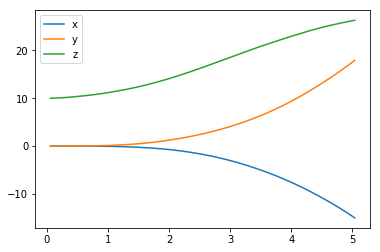

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

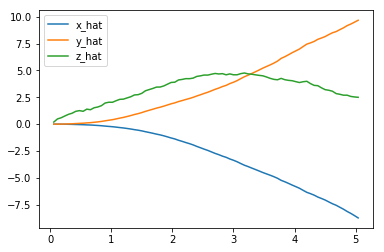

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes) are plotted,

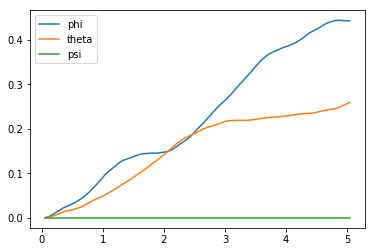

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

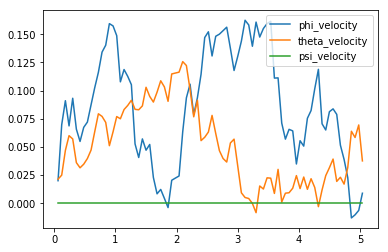

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, the code cell below prints the agent's choice of actions.

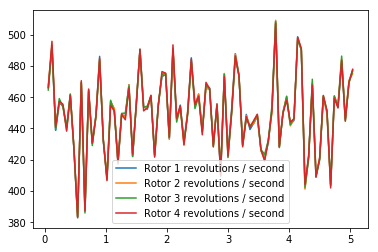

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifiying a task, the environment state is derived from the simulator. The code cell below prints the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-15.05887783  17.92597839  26.32967762   0.44265595   0.259076     0.        ]
[-8.7294484   9.67322961  2.49973518]
[ 0.00896614  0.03764609  0.        ]


In the sample task in `task.py`, the 6-dimensional pose of the quadcopter is used to construct the state of the environment at each timestep. However, when amending the task, the size of the state vector can be expanded by including the velocity information. Any combination of the pose, velocity, and angular velocity can be used here. Feel free to tinker here, and construct the state that suit the task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, `action repeat` is used here. For more familiarity with `action repeat` please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- The number of elements in the state vector is set. For the sample task, the 6-dimensional pose information is used to work with. To set the size of the state (`state_size`), `action repeat` must be taken in account.
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). The minimum (`action_low`) and maximum (`action_high`) values of each entry are set here.
- The sample task in this provided file is for the agent to reach a target position. The targeted position is specified as a variable.

The `reset()` method resets the simulator. The agent calls this method every time the episode ends. An example of this can be seen in the code cell below.

The `step()` method is perhaps the most important. It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent. Then, the reward is computed from `get_reward()`. The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, testing the performance of an agent on this task is accomplished.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

The code cell below shows how the agent performs on the sample task. 

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   2.672 (best =   2.693), noise_scale = 3.255

This agent should perform very poorly on this task.

## Define the Task, Design the Agent, and Train Your Agent!

`task.py` is amended to specify a chosen task. The chosen task here is to takeoff but other options of task can be chosen such as hover in place, land softly or reach a targeted pose.

After spcifying the task, `agents/policy_search.py` is used to define the agent in `agents/agent.py`. Ideas of methods such as `act()`, `learn()` or `reset_episode()` are included to modularize the code. 

The first agent created didn't learn well. Various hyperparameters and reward functions for the task were tweaked to arrive at a reasonably good behaviour. 

While developing the agent, it's important to keep an eye o how it's performing. The code cell above is used as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file. If the episode rewards are gradually increasing, this is an indication that the agent is learning.

In [10]:
## Done: Train your agent here.
import numpy as np
import sys
from agents.agent import DDPG
from task import TakeOff

num_episodes = 500

init_pos = np.array([0., 0., 0., 0., 0., 0.])
init_velocities = np.array([0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])
target_pos = np.array([0., 0., 100.])

task = TakeOff(init_pos = init_pos,
               init_velocities = init_velocities,
               init_angle_velocities = init_angle_velocities,
               target_pos = target_pos)

agent = DDPG(task)

rewards = []

for i_episode in range(1, num_episodes+1):
    step = 0
    state = agent.reset_episode()
    
    while True:
        step += 1
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        if done:
            rewards.append(agent.total_reward)
            print("\rEpisode = {:4d}, total_reward = {:7.3f} (best_score = {:7.3f})".format(
                i_episode, agent.total_reward, agent.best_score), end="")
            break
    sys.stdout.flush()
    

Using TensorFlow backend.


Episode =  500, total_reward = 59546.816 (best_score = 59546.819)

## Plot the Rewards

Once the performance is quite well, the episode rewards is plotted.

Mean rewards over the last 10 episodes:  59546.8168
Best score obtained:  59546.8192


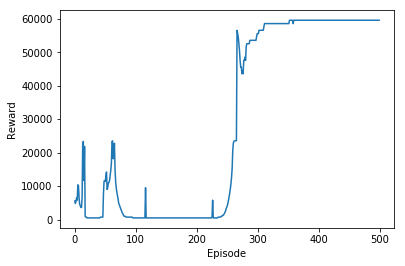

In [11]:
## Done: Plot the rewards.
final_performance = np.mean(rewards[-10:])
print('Mean rewards over the last 10 episodes: ', round(final_performance, 4))
print('Best score obtained: ', round(agent.best_score, 4))

plt.xlabel('Episode')
plt.ylabel('Reward')

plt.plot(rewards)

In [12]:
# For visualization of the agent

import csv

file_output = 'data_ddpg.csv'

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    for i in range(num_episodes):
        while True:
            rotor_speeds = agent.act(state)
            _, _, done = task.step(rotor_speeds)
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                break

/home/workspace/physics_sim.py:116: RuntimeWarning: overflow encountered in double_scalars
  C_T = max(.12 - .07*max(0, J)-.1*max(0, J)**2, 0)
/home/workspace/physics_sim.py:69: RuntimeWarning: overflow encountered in square
  linear_drag = 0.5 * self.rho * self.find_body_velocity()**2 * self.areas * self.C_d


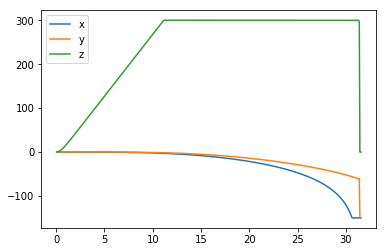

In [13]:
# Visualize how the position of the quadcopter evolved during the simulation

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

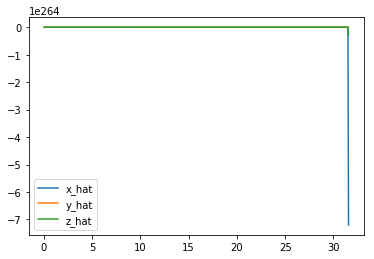

In [14]:
# velocity of the quadcopter.

plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

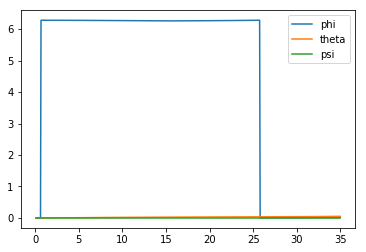

In [15]:
# the Euler angles

plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

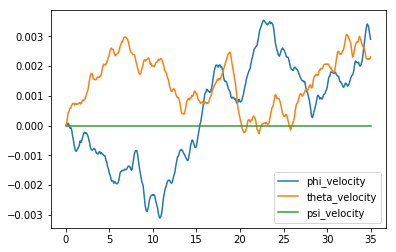

In [16]:
# velocities (in radians per second) corresponding to each of the Euler angles

plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

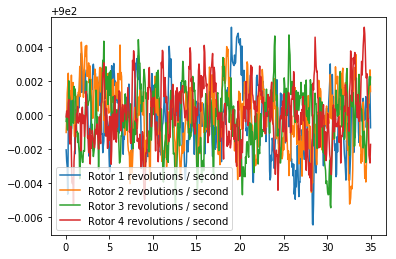

In [17]:
# agent's choice of actions

plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

### Reflections on task.py

The task specified in `task.py` is a take off task. The initial position of the agent is [0.,0.,0.] by default. The agent should take off straight up until reaching a certain defined height (target position) or beyond (not to confuse on the task of hovering: to hover in a defined point).

The reward function is implemented as penalizing the angles velocities of the agent thus enabling a steady take off.

Moreover, the distance between the current position and the target position in a 3 dimensional space is taken in account for extras rewards. There's a coefficient of 10 introduced for the z axis here as the goal here is for the agent to take off and not focus on the two other axis. 

### Reflections on the agent

The algorithm chosen here is the DDPG Algorithm which can be found in this [paper](https://arxiv.org/abs/1509.02971). As shown above, this algorithm performed well for this project.

After tweaking the hyperparameters based on the template given for the DDPG agent, their final values are as followed:

_Noise process_

`exploration_mu = 0`

`exploration_theta = 0.15`

`exploration_sigma = 0.001`

_Replay Memory_

`buffer_size = 100000`

`batch_size = 64`

_Algorithm parameters_

`gamma = 0.99`

`tau = 0.01`

The neural network architectures used for the Actor algorithm was the same as given in the template but with an addition of Dropout functions (value of 0.2) for each hidden layer. The neural network for the Critic algorithm also included Dropout functions (value of 0.2) and an additional hidden layer of 32 units each for the state and action pathways. Every nodes were relu activation functions.
Moreover, learning rates were added to the Actor and Critic neural networks' optimizer (both adam optimizer), respectively 0.0001 and 0.001

### Reflections on the agent's learning over time

The project of teaching a quadcopter how to fly is hard as lots of conditions have to be met in order to have a good task (take off in this case). In general for the take off task, there was a gradual learning curve as it can be seen on the episode rewards plot. The final performance of the agent is good as last 10 episodes' mean is 59546.8168 and the best score obtained is 59546.8192.

### Reflections on the experience working on this project.

In my opinion the hardest part was the get_reward function because the agent needs a good reward algorithm in order to perform well. At first, I didn't change at all the reward function given, and the rewards weren't satisfying and the agent wasn't learning much. But then by inserting the penalties according to the distance between its current position and its the angulare velocities, and giving constant reward, it performed pretty well.

However, the take off task could be even smoother without displacement in the x and y axis. In the reward function, we could penalize more those displacements for instance.
The actor and critic models may be even be more optimized with changing the units of each dense layers or by adding regularizers or batch mormalization.